In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("Silvermic.csv")

In [3]:
df.isnull().any()

Date                   False
Instrument Name        False
Symbol                 False
Expiry Date            False
Option Type            False
Strike Price           False
Open                   False
High                   False
Low                    False
Close                  False
Previous Close         False
Volume(Lots)           False
Volume(In 000's)       False
Value(Lacs)            False
Open Interest(Lots)    False
dtype: bool

In [4]:
dX=[]
dY=[]
dsize=df.shape[0]
timeportion=7
no_of_features=7

In [5]:
features=df['Close']

In [6]:
#Scaling of data using MinMaxScaler function.
X_Scaled=MinMaxScaler()
Y=features.values
Y=Y.reshape(-1,1)
#Scaled_data=X_Scaled.fit_transform(Y)

In [7]:
i=timeportion
for i in range(i,dsize,1):
    j=i-timeportion
    for j in range(j,i,1):
        dX.append(features[j])
    dY.append(features[i])
    


In [8]:
dsize

2519

In [9]:
x=np.array(dX)
dX=x.reshape(dsize-timeportion,no_of_features)

In [10]:
dX.shape

(2512, 7)

In [11]:
y=np.array(dY)
dY=y.reshape(-1,1)

In [12]:
dY.shape

(2512, 1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(dX, dY, test_size = 0.20, random_state = 0)

In [14]:
#printing no of train and test examples and its size
print("No. of training examples:",X_train.shape[0],"and its size is(%d)"%(X_train.shape[1]))
print("No. of test examples :",X_test.shape[0],"and its size is(%d)"%(X_test.shape[1]))

No. of training examples: 2009 and its size is(7)
No. of test examples : 503 and its size is(7)


In [15]:
#nrows, ncols = X_train.shape
#X_train = X_train.reshape(nrows, ncols, 1)
#nrows1,ncols1=X_test.shape
#X_test=X_test.reshape(nrows1,ncols1,1)

In [16]:
X_Scaled=MinMaxScaler()
Y_Scaled=MinMaxScaler()
X_train=X_Scaled.fit_transform(X_train)
Y_train=Y_Scaled.fit_transform(Y_train)
X_test=X_Scaled.transform(X_test)
Y_test=Y_Scaled.transform(Y_test)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv1D,MaxPooling1D,Flatten
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV




Using TensorFlow backend.


In [18]:
#some model parameters
output_dim=1
input_dim=X_train.shape[1]
batch_size=256
nb_epoch=20

In [19]:
# define MLP model
model = Sequential()
model.add(Dense(4, input_shape=(input_dim,), activation='relu', kernel_initializer='random_normal'))
model.add(Dense(2,activation='sigmoid',kernel_initializer='random_normal'))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

# define CNN Model
#model=Sequential()
##model.add(MaxPooling1D(pool_size=(1),strides=(1)))

#model.add(Conv1D(2,2,border_mode="same",activation='relu',kernel_initializer='he_uniform'))
#model.add(MaxPooling1D(pool_size=(1),strides=(1)))

#model.add(Flatten())
#model.add(Dense(output_dim,activation='linear'))

#model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

#def create_model(layers,activation):
 #   model=Sequential()
  #  for i,nodes in enumerate(layers):
   #     if i==0:
    #        model.add(Conv1D(nodes,2,input_shape=(ncols,1),border_mode="same",kernel_initializer='he_uniform'))
     #       model.add(Activation(activation))
      #      model.add(MaxPooling1D(pool_size=(1),strides=(1)))
       # else:
        #    model.add(Conv1D(nodes,2,kernel_initializer='he_uniform'))
         #   model.add(Activation(activation))
          #  model.add(MaxPooling1D(pool_size=(1),strides=(1)))
    
    #model.add(Flatten())
    #model.add(Dense(1,activation='linear'))
    #model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
    #return model

#model=KerasClassifier(build_fn=create_model,verbose=1)


In [20]:
#configuring model
history=model.fit(X_train,Y_train,epochs=nb_epoch,verbose=1,validation_data=[X_test,Y_test])


Train on 2009 samples, validate on 503 samples
Epoch 1/20
2009/2009 [==============================] - 0s 158us/step - loss: 0.2097 - accuracy: 4.9776e-04 - val_loss: 0.1513 - val_accuracy: 0.0000e+00
Epoch 2/20
2009/2009 [==============================] - 0s 71us/step - loss: 0.1166 - accuracy: 4.9776e-04 - val_loss: 0.0858 - val_accuracy: 0.0000e+00
Epoch 3/20
2009/2009 [==============================] - 0s 70us/step - loss: 0.0764 - accuracy: 4.9776e-04 - val_loss: 0.0626 - val_accuracy: 0.0000e+00
Epoch 4/20
2009/2009 [==============================] - 0s 72us/step - loss: 0.0610 - accuracy: 4.9776e-04 - val_loss: 0.0513 - val_accuracy: 0.0000e+00
Epoch 5/20
2009/2009 [==============================] - 0s 65us/step - loss: 0.0513 - accuracy: 4.9776e-04 - val_loss: 0.0430 - val_accuracy: 0.0000e+00
Epoch 6/20
2009/2009 [==============================] - 0s 66us/step - loss: 0.0434 - accuracy: 4.9776e-04 - val_loss: 0.0368 - val_accuracy: 0.0000e+00
Epoch 7/20
2009/2009 [============

In [21]:
#layers=[[4,2],[4]]
#activation=['sigmoid','relu']
#param_grid=dict(layers=layers,activation=activation,batch_size=[32],epochs=[100])
#grid=GridSearchCV(estimator=model,param_grid=param_grid)



In [22]:
#grid_result=grid.fit(X_train,Y_train)

In [23]:
#[grid_result.best_score_,grid_result.best_params_]

Train MSE : [0.004450135411520341, 0.0009955201530829072] Test MSE: [0.0038577338669515747, 0.0]


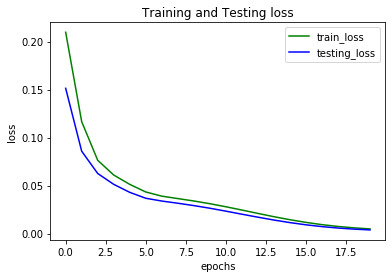

In [24]:
train_mse = model.evaluate(X_train, Y_train, verbose=0)
test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Train MSE :',train_mse,'Test MSE:', test_mse)

# plot loss during training

loss_train=history.history['loss']
loss_test=history.history['val_loss']
plt.title('Training and Testing loss')
plt.plot(loss_train,'g', label='train_loss')
plt.plot(loss_test,'b', label='testing_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

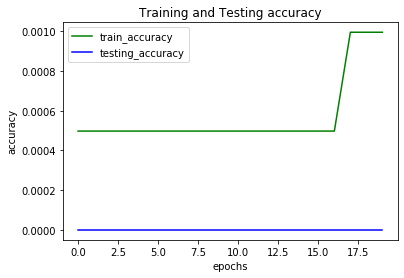

In [25]:
acc_train=history.history['accuracy']
acc_test=history.history['val_accuracy']
plt.title('Training and Testing accuracy')
plt.plot(acc_train,'g', label='train_accuracy')
plt.plot(acc_test,'b', label='testing_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [26]:
df_Test1=pd.read_csv("Silvermic_Test.csv")
features1=df_Test1['Close']
#Scaling of data using MinMaxScaler function.
Y1=features1.values
Y1=Y1.reshape(-1,1)
#TestX=X_Scaled.fit_transform(Y1)

In [27]:
#TestX.shape[0]

In [28]:
dX1=[]
dY1=[]
dsize1=features1.shape[0]


In [29]:
i=0
j=0
i=timeportion
for i in range(i,dsize1,1):
    j=i-timeportion
    for j in range(j,i,1):
        dX1.append(features1[j])
    dY1.append(features1[i])

In [30]:
x1=np.array(dX1)
dX1=x1.reshape(dsize1-timeportion,no_of_features)

In [31]:
#nrowst,ncolst=dX1.shape
#dX1=dX1.reshape(nrowst,ncolst,1)

In [32]:
dX1

array([[42111, 41812, 42415, 42378, 43573, 43761, 43700],
       [41812, 42415, 42378, 43573, 43761, 43700, 43549],
       [42415, 42378, 43573, 43761, 43700, 43549, 43481],
       [42378, 43573, 43761, 43700, 43549, 43481, 44607],
       [43573, 43761, 43700, 43549, 43481, 44607, 47135],
       [43761, 43700, 43549, 43481, 44607, 47135, 48138],
       [43700, 43549, 43481, 44607, 47135, 48138, 49236],
       [43549, 43481, 44607, 47135, 48138, 49236, 49490],
       [43481, 44607, 47135, 48138, 49236, 49490, 47817],
       [44607, 47135, 48138, 49236, 49490, 47817, 48785],
       [47135, 48138, 49236, 49490, 47817, 48785, 48704],
       [48138, 49236, 49490, 47817, 48785, 48704, 48284],
       [49236, 49490, 47817, 48785, 48704, 48284, 48857],
       [49490, 47817, 48785, 48704, 48284, 48857, 49023],
       [47817, 48785, 48704, 48284, 48857, 49023, 50503],
       [48785, 48704, 48284, 48857, 49023, 50503, 51012],
       [48704, 48284, 48857, 49023, 50503, 51012, 49520],
       [48284,

In [33]:
dX1=X_Scaled.fit_transform(dX1)

In [34]:
dX1

array([[0.03894243, 0.        , 0.00455385, 0.        , 0.01221617,
        0.03717966, 0.0290798 ],
       [0.        , 0.07853608, 0.        , 0.1384063 , 0.03717966,
        0.0290798 , 0.00902935],
       [0.07853608, 0.07371711, 0.14707692, 0.16018068, 0.0290798 ,
        0.00902935, 0.        ],
       [0.07371711, 0.2293566 , 0.17021538, 0.15311559, 0.00902935,
        0.        , 0.14951534],
       [0.2293566 , 0.25384215, 0.16270769, 0.13562659, 0.        ,
        0.14951534, 0.48519453],
       [0.25384215, 0.24589737, 0.14412308, 0.12775075, 0.14951534,
        0.48519453, 0.61837737],
       [0.24589737, 0.22623079, 0.13575385, 0.25816539, 0.48519453,
        0.61837737, 0.76417474],
       [0.22623079, 0.21737432, 0.27433846, 0.55096132, 0.61837737,
        0.76417474, 0.79790201],
       [0.21737432, 0.36402709, 0.58547692, 0.66712995, 0.76417474,
        0.79790201, 0.57575355],
       [0.36402709, 0.6932795 , 0.70892308, 0.7943016 , 0.79790201,
        0.57575355, 0.7

In [35]:
Y_pred = model.predict(dX1)
print(Y_pred)

[[0.08927186]
 [0.10499547]
 [0.12009954]
 [0.14683565]
 [0.21445912]
 [0.28769895]
 [0.3932531 ]
 [0.5037296 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]
 [0.5655302 ]]


In [36]:
Y_pred_inverse=Y_Scaled.inverse_transform(Y_pred)
Y_pred_inverse

array([[36613.81 ],
       [37217.2  ],
       [37796.82 ],
       [38822.816],
       [41417.87 ],
       [44228.445],
       [48279.086],
       [52518.62 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ],
       [54890.22 ]], dtype=float32)